# DECISIONTREE MODEL ANALYSIS

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

In [3]:
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
X = heart_df.drop(columns='DEATH_EVENT', axis=1)
y = heart_df['DEATH_EVENT']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
dt_model = DecisionTreeClassifier(random_state=42)

In [13]:
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred = dt_model.predict(X_test_scaled)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [19]:
print(f"Decision Tree Test Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Decision Tree Test Accuracy: 73.33%

Confusion Matrix:
 [[35  6]
 [10  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.60      0.47      0.53        19

    accuracy                           0.73        60
   macro avg       0.69      0.66      0.67        60
weighted avg       0.72      0.73      0.72        60



In [27]:
warnings.filterwarnings("ignore", message="X does not have valid feature names")
new_data = np.array([49, 1, 80, 0, 30, 1, 427000, 1, 138, 0, 0, 12]).reshape(1, -1)
new_data_scaled = scaler.transform(new_data)  

new_prediction = dt_model.predict(new_data_scaled)
new_probabilities = dt_model.predict_proba(new_data_scaled)

if new_prediction[0] == 1:
    print('Prediction for data: Heart Disease')
else:
    print('Prediction for data: No Heart Disease')

Prediction for data: No Heart Disease


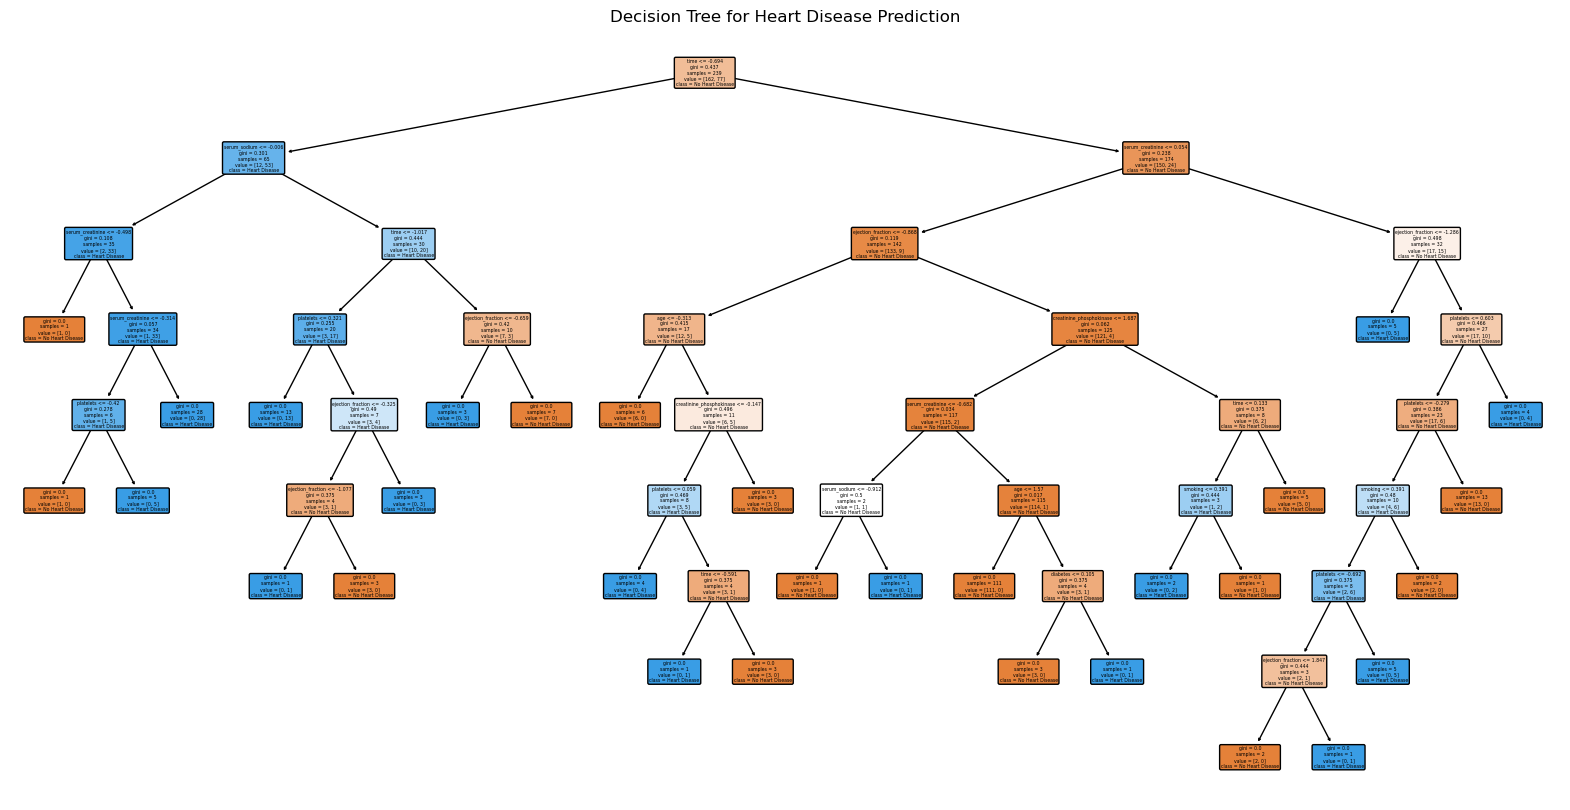

In [29]:
plt.figure(figsize=(20, 10))  
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], rounded=True)
plt.title('Decision Tree for Heart Disease Prediction')
plt.show()